<a href="https://colab.research.google.com/github/jasonnoy/COMP5318/blob/main/A2_ipynb_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5318 Assignment 2
*Make sure you change the file name with your unikey*

In [ ]:
pip install --upgrade pip

In [ ]:
import os
import pickle
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns;
import numpy as np
from PIL import Image
from numpy import asarray
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import decomposition
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# 1. Data set up


## 1.1 Load Data

Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.




In [ ]:
# parse .review file
def read_txt_data(file_name):
    with open(file_name, encoding='gb18030', errors='ignore') as file_object:
        lines = file_object.readlines()  # read lines
    data_set = []
    for line in lines:
        data_line = line.strip("\n").split()
        line_dict = {}
        for data in data_line:
            kv_pair = data.split(":")
            line_dict[kv_pair[0]] = kv_pair[1]
        data_set.append(line_dict)
    return data_set

### dataset 1

In [ ]:
book_review = read_txt_data("/content/drive/MyDrive/Datasets/amazon_book.review")

In [ ]:
data_size = len(book_review)
print(data_size)

5501


In [ ]:
class_feq={}
for line in book_review:
  for key in line.keys():
    if key in class_feq:
      class_feq[key] += 1
    else: 
      class_feq[key] = 1

In [ ]:
for key in class_feq.keys():
  class_feq[key] = class_feq[key]/data_size

In [ ]:
print (len(class_feq))

In [ ]:
classes = []
for key in class_feq.keys():
  if class_feq[key]>0.7:
    classes.append(key)
class_size = len(classes)
print (class_size)

10


In [ ]:
valid_set = []
for line in book_review:
  valid_set.append(float(line['#label#']))
print (len(valid_set))

5501


In [ ]:
train_set = np.zeros((data_size, class_size), dtype= np.int32)

In [ ]:
i = 0
for line in book_review:
  j = 0
  for cl in classes:
    if (cl in line.keys()):
      if (float(line[cl])==0):
        print("found 0")
        break
      train_set[i][j] = float(line[cl])
      j+=1
  i+=1
for i in range(5490,5500):
  print (train_set[i])

[3 4 3 6 1 6 7 1 3 2]
[4 3 4 3 1 1 5 1 3 5]
[2 3 3 2 4 4 2 2 0 0]
[4 3 5 2 1 7 2 1 1 0]
[ 9  5  9  4  4  8 20  4  2  2]
[1 6 6 2 1 4 9 5 3 4]
[ 2  9  6  3  3 11  1  2  3  0]
[5 7 4 6 6 9 4 3 4 0]
[3 5 4 4 5 8 2 2 4 0]
[ 9 17 14  6 13 10 23  5  3  3]


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0, strategy='mean')
train_set = imp.fit_transform(train_set)

In [ ]:
print (train_set[0])

In [ ]:

stand_train = preprocessing.StandardScaler()
stand_train = stand_train.fit_transform(train_set)

In [ ]:
robust_train = preprocessing.RobustScaler()
robust_train = robust_train.fit_transform(train_set)

In [ ]:
print(robust_train[5])

In [ ]:
# PCA
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(stand_train)

In [ ]:
print(len(X))

5501


### Dataset 2



---


# 2. K-means Clustering

## 2.1 Dataset 1

### Train K-means clustering

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
print (inertias)

[37176.656203846505, 18378.978298244525, 12939.0996404845, 10474.967208039572, 8739.041499646992, 7285.432622341172, 6205.338740084956, 5404.538927651054, 4810.475511416078]


### Evaluation functions

In [ ]:
###Some plot functions
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [ ]:
###Some more functions for fitting models and plotting results
from matplotlib.patches import Ellipse
from scipy.spatial.distance import cdist

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=20, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model



### First evaluation

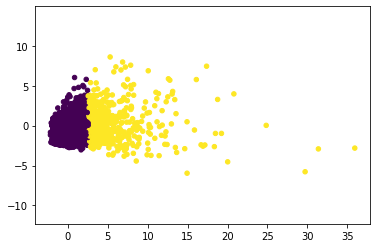

In [ ]:
plot_kmeans(kmeans_per_k[1], X, n_clusters=2, rseed=0, ax=None)

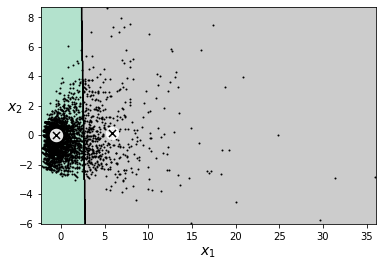

In [ ]:

k = 2
plot_decision_boundaries(kmeans_per_k[k-1], X)
plt.show()

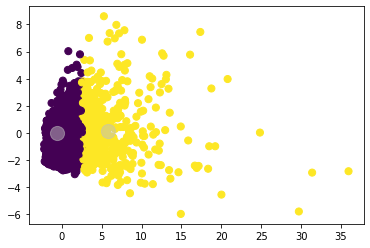

In [ ]:
y_means = kmeans_per_k[1].predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_means, s=50, cmap='viridis')
centers = kmeans_per_k[1].cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='silver', s=200, alpha=0.5);

### Second evaluation

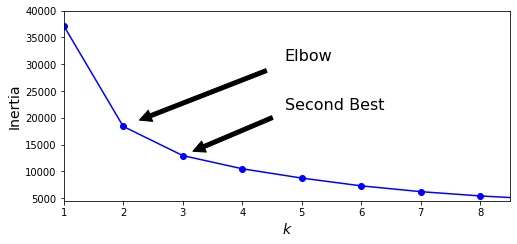

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Second Best',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.75),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 4500, 40000])
plt.show()

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

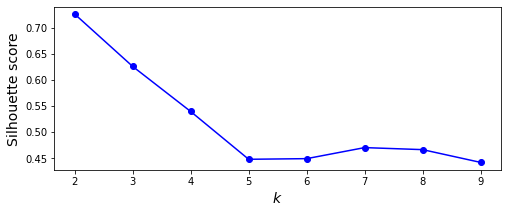

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

## 2.2 Dataset 2

### Train K-means clustering

### First evaluation

### Second evaluation 



---


# 3. Hierachical Clustering

## 3.1 Dataset 1

### Train Hierarchical clustering 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering = AgglomerativeClustering().fit(X)

### First evaluation 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
Z = linkage(X, 'ward')

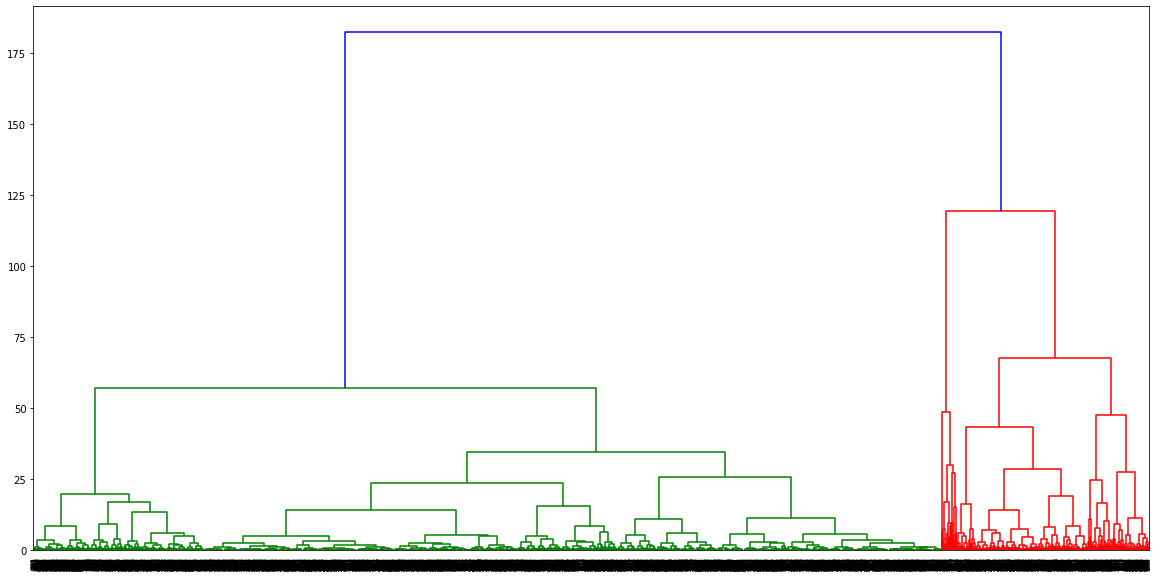

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
Z = linkage(X, 'ward')
f = fcluster(Z,4,'distance')
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z)
plt.show()


In [ ]:
print(len(dn['color_list']))

5500


In [ ]:
 y_hi=[0]
 for hi in dn['color_list']:
    if hi == 'g':
      y_hi.append(0)
    else:
      y_hi.append(1)


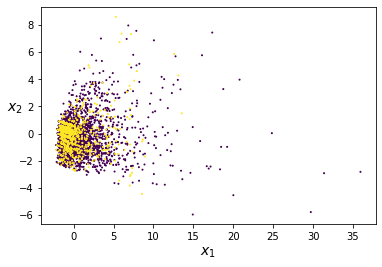

In [ ]:
plot_clusters(X, y_hi)

### Second evaluation 

## 3.2 Dataset 2

### Train Hierarchical clustering 

### First evaluation

### Second evalaution 



---


# 4. DBSCAN Clustering

## 4.1 Dataset 1

### Train DBSCAN clustering 

### First evaluation

### Second evaluation 

## 4.2 Dataset 2

### Train DBSCAN clustering 

### First evaluation 

### Second evaluation 